# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x
import numpy as np
from random import randint
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0'

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



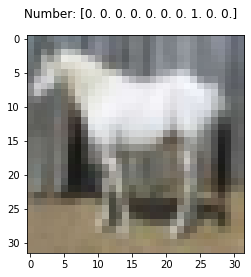

In [207]:
#Let's review the data
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

In [0]:
sc = StandardScaler()

In [0]:
trainX = trainX / 255.0
testX = testX / 255.0

In [0]:
#Convert labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 308us/sample - loss: 1.2603 - accuracy: 0.5597 - val_loss: 1.0315 - val_accuracy: 0.6427
Epoch 2/10
50000/50000 [==============================] - 8s 162us/sample - loss: 0.9473 - accuracy: 0.6717 - val_loss: 0.9342 - val_accuracy: 0.6752
Epoch 3/10
50000/50000 [==============================] - 8s 158us/sample - loss: 0.8199 - accuracy: 0.7157 - val_loss: 0.8970 - val_accuracy: 0.6941
Epoch 4/10
50000/50000 [==============================] - 8s 157us/sample - loss: 0.7327 - accuracy: 0.7479 - val_loss: 0.9072 - val_accuracy: 0.6898
Epoch 5/10
50000/50000 [==============================] - 8s 158us/sample - loss: 0.6653 - accuracy: 0.7688 - val_loss: 0.9218 - val_accuracy: 0.6992
Epoch 6/10
50000/50000 [==============================] - 8s 159us/sample - loss: 0.6127 - accuracy: 0.7841 - val_loss: 0.9322 - val_accuracy: 0.6958
Epoch 7/10
50000/50000 [=========================

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data')

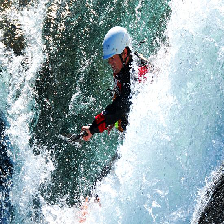

In [87]:
image = load_img('surfing.jpg', target_size=(224,224))
image

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [88]:
model_input = img_to_array(image)
model_input.shape

(224, 224, 3)

In [89]:
#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
#model_input = model_input.reshape(404,550,3,1)
model_input.shape

(1, 224, 224, 3)

In [0]:
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

In [91]:
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

In [92]:
#Predict
prediction = vgg.predict(model_input)
prediction.d

(1, 1000)

In [94]:
# convert the probabilities to class labels
label = decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


In [96]:
label

('n03873416', 'paddle', 0.45588744)

In [95]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

paddle (45.59%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('tweets.csv', encoding = "ISO-8859-1" )

**Drop null values**

*   Drop all the rows with null values




In [182]:
data.shape

(9093, 3)

In [0]:
data.dropna(inplace=True)

In [184]:
data.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [185]:
data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
data['tweet_text'] = data['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
data['tweet_text'] = data['tweet_text'].apply(lambda s: s.lower())
data['tweet_text'] = data['tweet_text'].str.strip()

## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [188]:
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [0]:
pos_or_neg_data = data.loc[(data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') |
          (data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [190]:
pd.value_counts(pos_or_neg_data.is_there_an_emotion_directed_at_a_brand_or_product)

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [191]:
pos_or_neg_data['is_there_an_emotion_directed_at_a_brand_or_product'] = pos_or_neg_data['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 1, 'Negative emotion': 0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
pos_or_neg_data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,0
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,1
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,1
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,0
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,1
7,# is just starting # is around the corner and ...,Android,1
8,eautifully smart and simple idea madebymany t...,iPad or iPhone App,1
9,ounting down the days to #sxsw plus strong ana...,Apple,1
10,xcited to meet the samsungmobileus at #sxsw so...,Android,1
11,ind amp tart mpromptu arties at # ith urricane...,Android App,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = pos_or_neg_data.tweet_text
y = pos_or_neg_data.is_there_an_emotion_directed_at_a_brand_or_product

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

In [0]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [199]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
multinom = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [201]:
multinom.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
log_predict = logreg.predict(X_test)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
multinom_predict = multinom.predict(X_test)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [0]:
# calculate accuracy of class predictions
from sklearn import metrics

In [205]:
metrics.accuracy_score(y_test, log_predict)

0.8671679197994987

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [206]:
metrics.accuracy_score(y_test, multinom_predict)

0.8558897243107769